In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/narendramodi_tweets.csv')

**Most Frequent HashTags** & **Most Frequent Users**

In [18]:
docs = data['text']
docs = docs.str.lower()
docs = docs.str.replace('[^a-z#@ ]','')
docs = docs.str.split(' ')
words_rows = docs.tolist()
words_all = [] # huge list - 59k [] 
docs_clean = [] # stemmed and cleaned sentences joined with space.
words_rows_clean = [] # list of lists [ [],[],[] ... ] 
hashtags = []
users = []

for row in words_rows:
    for i in row:
        if i.startswith('#'):
            hashtags.append(i)
            
for row in words_rows:
    for i in row:
        if i.startswith('@'):
            users.append(i)

In [26]:
top_hashtags = pd.Series(hashtags).value_counts().head(10).sort_values(ascending=False)
print(top_hashtags)

#sandeshsoldiers      108
#mannkibaat            91
#tirangayatra          84
#yogaday               53
#transformingindia     52
#idy                   44
#mycleanindia          24
#rio                   19
#                      14
#digidhanmela          10
dtype: int64


In [27]:
top_users = pd.Series(users).value_counts().head(10).sort_values(ascending=False)
print(top_users)

@pmoindia           145
@narendramodi       123
@meaindia            26
@rashtrapatibhvn     24
@bjpindia            20
@sureshpprabhu       15
@brics               14
@un                  12
@sushmaswaraj        12
@maithripalas        12
dtype: int64


**Date Time Analysis**

In [28]:
data['date'] = pd.to_datetime(data['created_at'])
data['date'].head()

0   2017-01-31 11:00:07
1   2017-01-31 10:59:12
2   2017-01-31 10:52:33
3   2017-01-31 10:52:22
4   2017-01-31 10:52:16
Name: date, dtype: datetime64[ns]

In [31]:
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['year'] = data['date'].dt.year
data['month_name'] = data['date'].dt.strftime('%b')
data['weekday'] = data['date'].dt.strftime('%A')

In [33]:
data['month_name'].value_counts().head()

Jun    413
Oct    393
Aug    383
May    307
Jul    303
Name: month_name, dtype: int64

In [64]:
data['text'] = data['text'].str.lower().str.replace('[^a-z#@ ]','')
data['sandeshsoldiers'] = data['text'].str.lower().apply(lambda x: 1 if '#sandeshsoldiers' in x.split(' ') else 0)
data['sandeshsoldiers'].value_counts()

0    3112
1     108
Name: sandeshsoldiers, dtype: int64

In [67]:
#data[['date','sandeshsoldiers']].head()

In [66]:
data.groupby('month')['sandeshsoldiers'].sum()

month
1       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10    107
11      1
12      0
Name: sandeshsoldiers, dtype: int64

**Resampling instead of group by** <br>

   If any month is missing , it will still show up in your analysis as 0, If we use groupby the missing months don't show up.

Condition - works only on datetime type

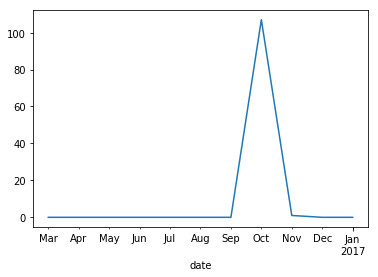

In [69]:
data.index = data['date']
data.resample('1M')['sandeshsoldiers'].sum().plot.line()